In [102]:
import numpy as np
import pandas as pd

#!pip install urllib
import urllib.request as url 

#!pip install bs4
from bs4 import BeautifulSoup as bs

#!pip install wordcloud
from wordcloud import WordCloud

import re
import requests
import matplotlib.pyplot as plt
%matplotlib inline
from operator import itemgetter 
import random
random.seed(333)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [3]:
def extract_web(link,d,tot_recs):
    html = url.urlopen(link).read()
    soup = bs(html, 'html.parser')
    
    for tr in soup.find_all('tr'):
        
        if len(tr.find_all('td'))<6:
            
            if bool(tr.find('font',{'color' : '#ffffff'})):
                    spans1=tr.find('font',{'color' : '#ffffff'})
                    date1=spans1.text
                    
            spans1=tr.find_all('span',{'class' : 'rank'})
            lines1=[span.get_text() for span in spans1]
            if(len(lines1)>0):
                
                try:
                    d['post_from_date'].append(date1)
                except:
                    d['post_from_date'].append('null')
                    
                try:
                    spans1=tr.find_all('a',{'class' : 'storylink'})
                    lines1 = [span.get_text() for span in spans1]
                    d['Title'].append(lines1[0])
                except:
                    d['Title'].append("null")
                
                try:
                    lines1 = [span['href'] for span in spans1]
                    d['URL'].append(lines1[0])
                except:
                    d['URL'].append('null')
                
                try:
                    spans1=tr.find_all('span',{'class' : 'sitestr'})
                    lines1 = [span.get_text() for span in spans1]     
                    d['domain'].append(lines1[0])
                except:
                    d['domain'].append('null')
                
            td1=tr.find_all('td',{'class' : 'subtext'})
            lines1=[td.get_text() for td in td1]
            
            if(len(lines1)>0):
                
                try:
                    spans1=tr.find_all('span',{'class' : 'score'})
                    lines1 = [span.get_text() for span in spans1]
                    d['num_upvotes'].append(lines1[0])
                except:
                    d['num_upvotes'].append('null')
                
                for link in tr.find_all('a'):
                
                    if bool(re.match('user?',link['href'])):
                        try:
                            d['posted_by_user'].append(link.text.lower())
                        except:
                            d['posted_by_user'].append('null')
                        
                    elif bool(re.match('item?',link['href'])) and not bool(re.search('ago',link.text.lower())):
                        try:
                            d['num_comments'].append(link.text.lower())
                        except:
                            d['num_comments'].append('null')
                        
                    elif bool(re.match('item?',link['href'])) and bool(re.search('ago',link.text.lower())):
                        spans1=tr.find_all('span',{'class' : 'age'})
                        lines1 = [span.get_text() for span in spans1]
                        try:
                            d['age_of_post'].append(lines1[0])
                        except:
                            d['age_of_post'].append('null')
        
        if len(d['Title'])>=tot_recs:
            try:
                blog_list = pd.DataFrame(d)
                return (blog_list,d,False,soup)
            except:
                continue
            
        
    blog_list = pd.DataFrame(d)
    return (blog_list,d,True,soup)


In [ ]:
#### Extracting 500 articles information

In [4]:
d = {'Title':[],'post_from_date':[],'age_of_post':[],'posted_by_user':[],'URL':[],'domain':[],'num_upvotes':[],'num_comments':[]}
str1='front'
continue1=True
while(continue1):
    
    link =str('https://news.ycombinator.com/'+str(str1))
    print(link)
    blog_list,d,continue1,soup = extract_web(link,d,500)
    if not bool(continue1):
        break
        
    if bool(soup.find_all('a',{'class' : 'morelink'})):
        spans1=soup.find_all('a',{'class' : 'morelink'})
        lines1 = [span['href'] for span in spans1]
        print(lines1[0])
        str1=lines1[0]
        
    else:
        spans1=soup.find_all('span',{'class' : 'hnmore'})
        lines11 = [span.find_all('a') for span in spans1]
        lines1= [span['href'] for span in lines11[0]]
        print(lines1[0])
        str1=lines1[0]

https://news.ycombinator.com/front
front?day=2019-12-12&p=2
https://news.ycombinator.com/front?day=2019-12-12&p=2
front?day=2019-12-12&p=3
https://news.ycombinator.com/front?day=2019-12-12&p=3
front?day=2019-12-11
https://news.ycombinator.com/front?day=2019-12-11
front?day=2019-12-11&p=2
https://news.ycombinator.com/front?day=2019-12-11&p=2
front?day=2019-12-11&p=3
https://news.ycombinator.com/front?day=2019-12-11&p=3
front?day=2019-12-11&p=4
https://news.ycombinator.com/front?day=2019-12-11&p=4
front?day=2019-12-10
https://news.ycombinator.com/front?day=2019-12-10
front?day=2019-12-10&p=2
https://news.ycombinator.com/front?day=2019-12-10&p=2
front?day=2019-12-10&p=3
https://news.ycombinator.com/front?day=2019-12-10&p=3
front?day=2019-12-10&p=4
https://news.ycombinator.com/front?day=2019-12-10&p=4
front?day=2019-12-09
https://news.ycombinator.com/front?day=2019-12-09
front?day=2019-12-09&p=2
https://news.ycombinator.com/front?day=2019-12-09&p=2
front?day=2019-12-09&p=3
https://news.yco

In [5]:
blog_list.head()

,Title,post_from_date,age_of_post,posted_by_user,URL,domain,num_upvotes,num_comments
0,Crows could be the smartest animal other than ...,2019-12-12,1 day ago,hhs,https://www.bbc.com/future/article/20191211-cr...,bbc.com,627 points,394 comments
1,Huginn: Create agents that monitor and act on ...,2019-12-12,1 day ago,daolf,https://github.com/huginn/huginn,github.com,1196 points,137 comments
2,Animal painting found in cave is 44k years old,2019-12-12,22 hours ago,reedx,https://www.bbc.com/news/world-asia-50754303,bbc.com,266 points,106 comments
3,Music for Programming (2011),2019-12-12,1 day ago,notkaiho,http://musicforprogramming.net/,musicforprogramming.net,411 points,258 comments
4,A podcast that hacks Ring camera owners live,2019-12-12,22 hours ago,pulisse,https://www.vice.com/en_us/article/z3bbq4/podc...,vice.com,313 points,236 comments


In [6]:
blog_list.shape

(500, 8)

In [9]:
blog_list2=blog_list.copy()

In [10]:
#### Creating a new column to hold the text retrieved from each website
blog_list2['text']=''

In [14]:
blog_list2.head()

,Title,post_from_date,age_of_post,posted_by_user,URL,domain,num_upvotes,num_comments,text
0,Crows could be the smartest animal other than ...,2019-12-12,1 day ago,hhs,https://www.bbc.com/future/article/20191211-cr...,bbc.com,627 points,394 comments,
1,Huginn: Create agents that monitor and act on ...,2019-12-12,1 day ago,daolf,https://github.com/huginn/huginn,github.com,1196 points,137 comments,
2,Animal painting found in cave is 44k years old,2019-12-12,22 hours ago,reedx,https://www.bbc.com/news/world-asia-50754303,bbc.com,266 points,106 comments,
3,Music for Programming (2011),2019-12-12,1 day ago,notkaiho,http://musicforprogramming.net/,musicforprogramming.net,411 points,258 comments,
4,A podcast that hacks Ring camera owners live,2019-12-12,22 hours ago,pulisse,https://www.vice.com/en_us/article/z3bbq4/podc...,vice.com,313 points,236 comments,


In [12]:
blog_list3=blog_list2.copy()

### Extracing text from all 500 websites

#### Not able to extract data from .pdf files are no replaced the text value with null in such scenarios. Also if there is no paragraph
#### tags in the website then also we reaplaced text value with null

In [13]:
for i,val in enumerate(blog_list3['URL']):
    
    link=str(val)
    print(link)
    
    try:
        html = url.urlopen(link).read()
        soup = bs(html, 'html.parser')
        text_all = soup.find_all('p')
        text_data = ""
    
        for text in text_all:
            if not 'copyright' in text.text.lower():
                text_data = text_data +" " +text.text
    
        if str.strip(text_data) != "":
            blog_list3.iloc[i,8]=text_data
        else:
            blog_list3.iloc[i,8]='null'

    except Exception as e:
        blog_list3.iloc[i,8]=str(e)
        

https://www.bbc.com/future/article/20191211-crows-could-be-the-smartest-animal-other-than-primates
https://github.com/huginn/huginn
https://www.bbc.com/news/world-asia-50754303
http://musicforprogramming.net/
https://www.vice.com/en_us/article/z3bbq4/podcast-livestreams-hacked-ring-cameras-nulledcast
https://telegra.ph/Why-OpenBSD-is-marginally-less-horrible-12-05
https://instadeq.com/blog/posts/things-end-users-care-about-but-programmers-dont/
https://www.manton.org/2019/12/11/twitter-to-decentralize.html
https://twitter.com/AntNesterov/status/1205086129504104460
https://www.drdobbs.com/parallel/inside-softram-95/184409937
https://www.anishathalye.com/2019/12/12/constraint-based-graphic-design/
https://github.com/dabreegster/abstreet
https://wattenberger.com/blog/react-hooks
https://www.bbc.co.uk/bbcthree/article/5c237a34-7a47-4deb-a5b4-a23e77cc88f7
https://github.com/tbsschroeder/using-clojure-for-web-apps
https://lwn.net/ml/oss-security/CALCETrW1z0gCLFJz-1Jwj_wcT3+axXkP_wOCxY8JkbSLz

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


https://medium.com/against-surveillance-capitalism/how-a-chinese-company-built-a-250-million-search-hijacking-empire-35f957566852
https://scholar.harvard.edu/files/waldo/files/ps-2006-6.pdf


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


https://github.com/TahaSh/vue-forum-app
http://akkartik.name/post/wart-layers
https://magenta.tensorflow.org/drumbot
https://www.networknext.com/post/the-internet-doesnt-care-about-your-game
https://www.0x65.dev/blog/2019-12-11/the-pivot-that-excited-mozilla-and-google.html
https://opensource.christmas/2019/11
https://www.benkuhn.net/grad
https://kotlin.christmas/2019/11
https://voxeu.org/article/elite-violence-and-elite-numeracy-europe-500-1900-ce-co-evolution
https://www.wired.com/story/simone-giertz-build-what-you-want/
https://docs.oracle.com/en/java/javase/11/docs/api/java.base/java/net/URL.html#equals(java.lang.Object)
https://iris-hep.org/projects/ppx.html
http://asciiqr.com/
https://www.airlineratings.com/news/jetstar-pilots-forgot-lower-landing-gear/
https://decrypt.co/14386/jack-dorsey-wants-to-decentralize-twitter.
https://www.japanpowered.com/japan-culture/jisei-the-japanse-death-poem
https://wfh.substack.com/p/why-the-next-professional-network
https://algorithmwatch.org/en

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


https://www.citylab.com/perspective/2019/12/car-free-streets-plans-sf-market-street-new-york-europe-us/603391
https://www.reddit.com/r/kde/comments/e7136e/google_bans_falkon_and_konqueror_browsers/
https://arewesimpleyet.org/
https://www.boulderweekly.com/boulderganic/gardens-of-the-sun/
https://www.bloomberg.com/news/articles/2019-12-11/big-tech-companies-slide-in-annual-best-places-to-work-survey
https://www.ijcai.org/Proceedings/81-2/Papers/071.pdf


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


https://security-and-privacy-reference-architecture.readthedocs.io/en/latest/
https://twitter.com/paraga/status/1204766188074459136
https://bugs.mysql.com/bug.php?id=12654
https://en.wikipedia.org/wiki/Scottish_Book
https://www.nytimes.com/2019/11/26/magazine/aurelius-capital-v-puerto-rico.html
https://will-r-chase.github.io/eq_bw/
https://en.wikipedia.org/wiki/North_American_Phalanx
https://developers.googleblog.com/2019/12/flutter-ui-ambient-computing.html
https://ostif.org/our-audit-of-unbound-dns-by-x41-d-sec-full-results/
https://tech.ovoenergy.com/adventures-with-dockerised-headed-chrome-extensions-and-selenium-python/
https://www.nytimes.com/2019/12/10/books/review/the-shadow-of-vesuvius-a-life-of-pliny-daisy-dunn.html
https://observablehq.com/@observablehq/htl
https://www.wsj.com/articles/vatican-uses-donations-for-the-poor-to-plug-its-budget-deficit-11576075764
https://bespoken.io/blog/the-next-model-for-voice/
https://www.theatlantic.com/entertainment/archive/2019/12/the-live

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


https://www.andrew.cmu.edu/user/azj/cmucoin/
https://boingboing.net/2019/12/09/leeched.html
https://www.vox.com/culture/2017/4/24/14912316/zardulu-viral-videos-mythmaking-surrealism-pedro-lasch
https://remotemasters.dev/fully-remote-companies
https://www.routefifty.com/finance/2019/12/ohio-found-117000-double-payments-through-data-analytics/161747/
https://ctsrc.github.io/simulated-victor-game/
https://blog.google/products/chrome/better-password-protections/
https://www.washingtonexaminer.com/opinion/small-town-america-fights-for-its-life
https://functional.christmas/2019/11
https://www.smithsonianmag.com/smithsonian-institution/great-wave-hokusai-180973693/
item?id=21765528
http://www.therandymon.com/index.php?/archives/338-This-isnt-fun-anymore.html
https://www.macrumors.com/2019/12/10/apple-pro-display-xdr-cleaning-cloth/
https://www.theguardian.com/books/2019/dec/10/the-pulse-glass-by-gillian-tindall-review-personal-history-through-objects
http://nautil.us/issue/79/catalysts/how-i-

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


https://www.nytimes.com/2019/12/10/technology/whatsapp-barr-encryption.html
https://www.fatpick.com/
https://asciinema.org/
https://openlayers.org/
item?id=21743302
https://github.com/docker-slim/docker-slim
https://kong.cash/
https://twitter.com/CascadianSolo/status/1204306278173958145
https://webkit.org/blog/9661/preventing-tracking-prevention-tracking/
https://jsantell.com/l-systems
https://www.cnn.com/travel/article/interspace-new-airplane-seat/index.html
https://vas3k.com/blog/computational_photography/
http://www.olafsw.de/a-better-qt-because-of-open-source-and-kde/
https://www.intel.com/content/www/us/en/security-center/advisory/intel-sa-00317.html
https://www.outsideonline.com/2406433/thieves-bluetooth-scanner-vehicle-break-in
https://common-lisp.net/project/armedbear/
http://pixlr.com/e
https://www.startupschool.org/
https://theconversation.com/a-6-000-year-old-fruit-fly-gave-the-world-modern-cheeses-and-yogurts-128165
https://www.buzzfeednews.com/article/craigsilverman/facebo

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


https://blog.cynthia.re/post/nintendo-switch-ethernet-switch
https://www.sametab.com/blog/operations-and-internal-communication-strategies-for-effective-ceos
https://emacsair.me/2017/09/01/magit-walk-through/
https://github.com/davidferguson/yahoogroups-joiner
https://www.theinformation.com/articles/apples-ad-targeting-crackdown-shakes-up-ad-market?pu=hackernews4qs3ac&utm_source=hackernews&utm_medium=unlocka
https://www.nytimes.com/2019/12/08/obituaries/caroll-spinney-dead.html
https://en.wikipedia.org/wiki/Transputer
https://twitter.com/nickwalton00/status/1203370250030350338
https://www.wsj.com/articles/american-factories-demand-white-collar-education-for-blue-collar-work-11575907185
https://git.kernel.org/pub/scm/linux/kernel/git/netdev/net-next.git/commit/?id=e7096c131e5161fa3b8e52a650d7719d2857adfd
https://fivebooks.com/best-books/science-2019-barbara-kiser/
https://www.vitavonni.de/blog/201503/2015031201-the-sad-state-of-sysadmin-in-the-age-of-containers.html
https://www.jefftk.c

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


http://jpkoning.blogspot.com/2019/12/a-way-to-make-anonymous-online-donations.html
https://www.wired.com/story/collaborative-software-wary-cloud/
https://www.wsj.com/articles/five-cities-account-for-vast-majority-of-growth-in-tech-jobs-study-finds-11575867660
https://www.bbc.com/news/technology-50713723
https://jvns.ca/blog/twitter-memes-challenge/
https://www.cs.utah.edu/plt/publications/jfp12-draft-fcdf.pdf


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


https://en.wikipedia.org/wiki/Fu-Go_balloon_bomb
https://pypi.org/project/pyFileFixity/
https://www.newyorker.com/magazine/2019/12/16/how-william-gibson-keeps-his-science-fiction-real
https://ncase.me/trust/
https://www.worth.com/how-to-buy-a-private-jet/
https://onezero.medium.com/900-000-americans-tell-google-they-want-to-try-buy-or-quit-heroin-every-year-48f725ee5db9
https://www.atlasobscura.com/articles/cool-bar-montana
https://tedium.co/2019/12/05/telephone-caller-id-history/
https://spectrum.ieee.org/tech-talk/at-work/tech-careers/what-are-your-options-for-cognitive-enhancement
http://edition.cnn.com/style/article/ice-stupa-sonam-wangchuk/index.html
http://gocheese.cypherpunks.ru/
https://github.com/ecaron/smart-nightlight-manager
https://twotone.io/
https://www.wsj.com/articles/if-bitcoin-looks-like-it-isnt-trading-its-because-it-isnt-11575637204
https://javascript.christmas/2019/9
https://museuminabox.org/
https://www.cloudmanagementinsider.com/key-takeaways-announcements-kubec

In [15]:
data=blog_list3.copy()

In [16]:
#Duplicating the original text extracted before proceeeding with preprocessing steps

import copy
print(type(data['text']))
original_data = copy.deepcopy(data)
print(data.keys())
print(original_data.keys())

<class 'pandas.core.series.Series'>
Index(['Title', 'post_from_date', 'age_of_post', 'posted_by_user', 'URL',
       'domain', 'num_upvotes', 'num_comments', 'text'],
      dtype='object')
Index(['Title', 'post_from_date', 'age_of_post', 'posted_by_user', 'URL',
       'domain', 'num_upvotes', 'num_comments', 'text'],
      dtype='object')


In [17]:
data["text"]= data["text"].astype(str)
data['text'] = [text.strip().lower() for text in data['text']]
data['text'][:10]

0    menu t the crow’s name was betty. and she was ...
1    github is home to over 40 million developers w...
2    share this with email facebook messenger messe...
3                            http error 403: forbidden
4    image: wmc5 a blaring siren suddenly rips thro...
5    the following document is an attempt to consol...
6    instadeq team\n             2019-12-09 20:03 (...
7    this morning, jack dorsey dropped a bombshell:...
8    we've detected that javascript is disabled in ...
9                            http error 403: forbidden
Name: text, dtype: object

#### Defining the functions to perform basic steps like
expanding contractions

In [19]:
data['text'][0]

'menu t the crow’s name was betty. and she was on her way to stardom. a gaggle of oxford university scientists watched in wonder as she casually picked up a piece of wire in her cage and then used a nearby object to bend it at one end, transforming the wire into a hooked tool. that tool allowed betty to hoist up a small container of meat – delicious pig’s heart – from inside a plastic tube. lunch was served. back then, in 2002, betty’s feat was a source of amazement. how did this crow solve such a complex problem so spontaneously? it suggested mental acrobatics akin to our own. this, the headlines read, was one stunningly clever crow. except that betty was not quite as special as some first thought. many years later, research showed that new caledonian crows are habitual tool-benders. in the wild, they do it all the time. observers had initially been startled by betty’s behaviour because it looked as though she had come up with the design for her hooked tool on the fly. like an enginee

In [20]:
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [21]:
def expand_contractions(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text
data['text'] = [expand_contractions(re.sub('’', "'", text)) for text in data['text']]
data['text'][0]

"menu t the crow's name was betty. and she was on her way to stardom. a gaggle of oxford university scientists watched in wonder as she casually picked up a piece of wire in her cage and then used a nearby object to bend it at one end, transforming the wire into a hooked tool. that tool allowed betty to hoist up a small container of meat – delicious pig's heart – from inside a plastic tube. lunch was served. back then, in 2002, betty's feat was a source of amazement. how did this crow solve such a complex problem so spontaneously? it suggested mental acrobatics akin to our own. this, the headlines read, was one stunningly clever crow. except that betty was not quite as special as some first thought. many years later, research showed that new caledonian crows are habitual tool-benders. in the wild, they do it all the time. observers had initially been startled by betty's behaviour because it looked as though she had come up with the design for her hooked tool on the fly. like an enginee

#### Removing scrup words

In [22]:
def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    
    #Remove extra spaces from the text
    text = re.sub("\s+", ' ', text)
    return text

In [23]:
data['text'] = [scrub_words(text) for text in data['text']]
data['text'][0]

'menu t the crow s name was betty and she was on her way to stardom a gaggle of oxford university scientists watched in wonder as she casually picked up a piece of wire in her cage and then used a nearby object to bend it at one end transforming the wire into a hooked tool that tool allowed betty to hoist up a small container of meat delicious pig s heart from inside a plastic tube lunch was served back then in betty s feat was a source of amazement how did this crow solve such a complex problem so spontaneously it suggested mental acrobatics akin to our own this the headlines read was one stunningly clever crow except that betty was not quite as special as some first thought many years later research showed that new caledonian crows are habitual tool benders in the wild they do it all the time observers had initially been startled by betty s behaviour because it looked as though she had come up with the design for her hooked tool on the fly like an engineer inventing a new machine in 

#### Tokenization

In [27]:
from nltk.tokenize import sent_tokenize
from tqdm import tqdm_notebook
tqdm_notebook().pandas()

In [29]:
data['sentences'] = data.text.progress_map(sent_tokenize)

In [35]:
data['text'].head(1).tolist()

['menu t the crow s name was betty and she was on her way to stardom a gaggle of oxford university scientists watched in wonder as she casually picked up a piece of wire in her cage and then used a nearby object to bend it at one end transforming the wire into a hooked tool that tool allowed betty to hoist up a small container of meat delicious pig s heart from inside a plastic tube lunch was served back then in betty s feat was a source of amazement how did this crow solve such a complex problem so spontaneously it suggested mental acrobatics akin to our own this the headlines read was one stunningly clever crow except that betty was not quite as special as some first thought many years later research showed that new caledonian crows are habitual tool benders in the wild they do it all the time observers had initially been startled by betty s behaviour because it looked as though she had come up with the design for her hooked tool on the fly like an engineer inventing a new machine in

In [36]:
data['sentences'].head(1).tolist()

[['menu t the crow s name was betty and she was on her way to stardom a gaggle of oxford university scientists watched in wonder as she casually picked up a piece of wire in her cage and then used a nearby object to bend it at one end transforming the wire into a hooked tool that tool allowed betty to hoist up a small container of meat delicious pig s heart from inside a plastic tube lunch was served back then in betty s feat was a source of amazement how did this crow solve such a complex problem so spontaneously it suggested mental acrobatics akin to our own this the headlines read was one stunningly clever crow except that betty was not quite as special as some first thought many years later research showed that new caledonian crows are habitual tool benders in the wild they do it all the time observers had initially been startled by betty s behaviour because it looked as though she had come up with the design for her hooked tool on the fly like an engineer inventing a new machine i

In [37]:
from nltk.tokenize import word_tokenize

In [41]:
data['tokens'] = data['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
#print(data['tokens'].head(1).tolist()[0][:3])

In [42]:
print(data['tokens'].head(1).tolist())

[[['menu', 't', 'the', 'crow', 's', 'name', 'was', 'betty', 'and', 'she', 'was', 'on', 'her', 'way', 'to', 'stardom', 'a', 'gaggle', 'of', 'oxford', 'university', 'scientists', 'watched', 'in', 'wonder', 'as', 'she', 'casually', 'picked', 'up', 'a', 'piece', 'of', 'wire', 'in', 'her', 'cage', 'and', 'then', 'used', 'a', 'nearby', 'object', 'to', 'bend', 'it', 'at', 'one', 'end', 'transforming', 'the', 'wire', 'into', 'a', 'hooked', 'tool', 'that', 'tool', 'allowed', 'betty', 'to', 'hoist', 'up', 'a', 'small', 'container', 'of', 'meat', 'delicious', 'pig', 's', 'heart', 'from', 'inside', 'a', 'plastic', 'tube', 'lunch', 'was', 'served', 'back', 'then', 'in', 'betty', 's', 'feat', 'was', 'a', 'source', 'of', 'amazement', 'how', 'did', 'this', 'crow', 'solve', 'such', 'a', 'complex', 'problem', 'so', 'spontaneously', 'it', 'suggested', 'mental', 'acrobatics', 'akin', 'to', 'our', 'own', 'this', 'the', 'headlines', 'read', 'was', 'one', 'stunningly', 'clever', 'crow', 'except', 'that', 'be

#### Lemmatizing with POS tagging

In [43]:
from nltk import pos_tag

In [44]:
data['POS_tokens'] = data['tokens'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])


In [46]:
print(data['POS_tokens'].head(1).tolist())

[[[('menu', 'NN'), ('t', 'VBZ'), ('the', 'DT'), ('crow', 'NN'), ('s', 'NN'), ('name', 'NN'), ('was', 'VBD'), ('betty', 'JJ'), ('and', 'CC'), ('she', 'PRP'), ('was', 'VBD'), ('on', 'IN'), ('her', 'PRP$'), ('way', 'NN'), ('to', 'TO'), ('stardom', 'VB'), ('a', 'DT'), ('gaggle', 'NN'), ('of', 'IN'), ('oxford', 'NN'), ('university', 'NN'), ('scientists', 'NNS'), ('watched', 'VBD'), ('in', 'IN'), ('wonder', 'NN'), ('as', 'IN'), ('she', 'PRP'), ('casually', 'RB'), ('picked', 'VBD'), ('up', 'RP'), ('a', 'DT'), ('piece', 'NN'), ('of', 'IN'), ('wire', 'NN'), ('in', 'IN'), ('her', 'PRP$'), ('cage', 'NN'), ('and', 'CC'), ('then', 'RB'), ('used', 'VBD'), ('a', 'DT'), ('nearby', 'JJ'), ('object', 'NN'), ('to', 'TO'), ('bend', 'VB'), ('it', 'PRP'), ('at', 'IN'), ('one', 'CD'), ('end', 'NN'), ('transforming', 'VBG'), ('the', 'DT'), ('wire', 'NN'), ('into', 'IN'), ('a', 'DT'), ('hooked', 'JJ'), ('tool', 'NN'), ('that', 'IN'), ('tool', 'NN'), ('allowed', 'VBD'), ('betty', 'JJ'), ('to', 'TO'), ('hoist', 

In [47]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [51]:
# Lemmatizing each word with its POS tag, in each sentence
data['tokens_lemmatized'] = data['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

In [52]:
data['tokens_lemmatized'].head(1).tolist()

[[['menu',
   't',
   'the',
   'crow',
   's',
   'name',
   'be',
   'betty',
   'and',
   'she',
   'be',
   'on',
   'her',
   'way',
   'to',
   'stardom',
   'a',
   'gaggle',
   'of',
   'oxford',
   'university',
   'scientist',
   'watch',
   'in',
   'wonder',
   'as',
   'she',
   'casually',
   'pick',
   'up',
   'a',
   'piece',
   'of',
   'wire',
   'in',
   'her',
   'cage',
   'and',
   'then',
   'use',
   'a',
   'nearby',
   'object',
   'to',
   'bend',
   'it',
   'at',
   'one',
   'end',
   'transform',
   'the',
   'wire',
   'into',
   'a',
   'hooked',
   'tool',
   'that',
   'tool',
   'allow',
   'betty',
   'to',
   'hoist',
   'up',
   'a',
   'small',
   'container',
   'of',
   'meat',
   'delicious',
   'pig',
   's',
   'heart',
   'from',
   'inside',
   'a',
   'plastic',
   'tube',
   'lunch',
   'be',
   'serve',
   'back',
   'then',
   'in',
   'betty',
   's',
   'feat',
   'be',
   'a',
   'source',
   'of',
   'amazement',
   'how',
   'do'

#### Regrouping tokens and removing stop words

In [53]:
from nltk.corpus import stopwords
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something','s','t']
my_stopwords = stopwords.words('English') + stopwords_verbs + stopwords_other

In [54]:
from itertools import chain # to flatten list of sentences of tokens into list of tokens

In [55]:
data['tokens_nostopswords'] = data['tokens_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
data['tokens_nostopswords'] = data['tokens_nostopswords'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])

In [56]:
data['tokens_nostopswords'].head(1).tolist()

[['menu',
  'crow',
  'name',
  'betty',
  'way',
  'stardom',
  'gaggle',
  'oxford',
  'university',
  'scientist',
  'watch',
  'wonder',
  'casually',
  'pick',
  'piece',
  'wire',
  'cage',
  'nearby',
  'object',
  'bend',
  'end',
  'transform',
  'wire',
  'hooked',
  'tool',
  'tool',
  'allow',
  'betty',
  'hoist',
  'small',
  'container',
  'meat',
  'delicious',
  'pig',
  'heart',
  'inside',
  'plastic',
  'tube',
  'lunch',
  'serve',
  'back',
  'betty',
  'feat',
  'source',
  'amazement',
  'crow',
  'solve',
  'complex',
  'problem',
  'spontaneously',
  'suggest',
  'mental',
  'acrobatics',
  'akin',
  'headline',
  'read',
  'stunningly',
  'clever',
  'crow',
  'except',
  'betty',
  'quite',
  'special',
  'first',
  'think',
  'many',
  'year',
  'later',
  'research',
  'show',
  'new',
  'caledonian',
  'crow',
  'habitual',
  'tool',
  'bender',
  'wild',
  'time',
  'observer',
  'initially',
  'startle',
  'betty',
  'behaviour',
  'look',
  'though',
 

In [64]:
## tfidf vectorizer needs sentence and not token. Hence we need to combine all the tokens back to form a string

data['text_lemmatized_tokens_nostopwords'] = [' '.join(text) for text in data['tokens_nostopswords']]
data['text_lemmatized_tokens_nostopwords'][0]

'menu crow name betty way stardom gaggle oxford university scientist watch wonder casually pick piece wire cage nearby object bend end transform wire hooked tool tool allow betty hoist small container meat delicious pig heart inside plastic tube lunch serve back betty feat source amazement crow solve complex problem spontaneously suggest mental acrobatics akin headline read stunningly clever crow except betty quite special first think many year later research show new caledonian crow habitual tool bender wild time observer initially startle betty behaviour look though design hooked tool fly engineer invent new machine reality new caledonians evolve hooked tool soft twig part usual foraging activity less moment genius expression nature might strange evolution future life animal survive climate change animal smart us downplay cognitive ability christian rutz university st andrew least force us reassess insightful betty behaviour new caledonian crow belong corvid family bird jackdaw rook 

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=20000,
                                 min_df=0.2,
                                 use_idf=True, ngram_range=(1,4))

tfidf_matrix = tfidf_vectorizer.fit_transform(data['text_lemmatized_tokens_nostopwords'])

print(tfidf_matrix.shape)

(500, 153)


In [66]:
terms = tfidf_vectorizer.get_feature_names()
print(type(terms))
terms[:5]

<class 'list'>


['able', 'actually', 'add', 'allow', 'almost']

#### K-mean Clustering
#### Fitting the elbow curve to identify right number of clusters/topics

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import joblib
Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(tfidf_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

#### From the below distances we can see that the sum of squared distances change a bit more when comared with other cluster
#### number is at "Number of clusters=4" and so I believe to chose number of topics as 4

In [71]:
for k in K:
    print("Number of Clusters=",k,"             Sum of squared distance=",Sum_of_squared_distances[k-1])

Number of Clusters= 1              Sum of squared distance= 360.65593308993385
Number of Clusters= 2              Sum of squared distance= 297.5748510946082
Number of Clusters= 3              Sum of squared distance= 278.7540430552517
Number of Clusters= 4              Sum of squared distance= 270.25112962655845
Number of Clusters= 5              Sum of squared distance= 260.6565745123576
Number of Clusters= 6              Sum of squared distance= 253.3051999068288
Number of Clusters= 7              Sum of squared distance= 249.2881751206761
Number of Clusters= 8              Sum of squared distance= 243.0587864307392
Number of Clusters= 9              Sum of squared distance= 240.61054464768586
Number of Clusters= 10              Sum of squared distance= 237.25609574243296
Number of Clusters= 11              Sum of squared distance= 231.77121825698663
Number of Clusters= 12              Sum of squared distance= 228.57962523848306
Number of Clusters= 13              Sum of squared dist

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


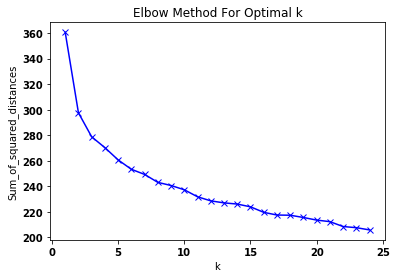

In [68]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


### LDA
#### Prepare bi-grams and tri-grams

In [57]:
from gensim.models import Phrases

In [58]:
tokens = data['tokens_nostopswords'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)
tokens = list(trigram_model[bigram_model[tokens]])

#### Prepare objects for LDA gensim implementation

In [59]:
from gensim import corpora

In [60]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

#### Running LDA

In [72]:
from gensim import models

np.random.seed(333)
num_topics = 4
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

Wall time: 6.69 s


#### Looking at topics

In [74]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=30):
    print(str(i)+": "+ topic)
    print()

0: 0.007*"people" + 0.006*"time" + 0.005*"work" + 0.005*"think" + 0.004*"thing" + 0.004*"could" + 0.004*"way" + 0.004*"book" + 0.003*"even" + 0.003*"world" + 0.003*"first" + 0.003*"find" + 0.003*"new" + 0.003*"well" + 0.003*"write" + 0.003*"good" + 0.003*"life" + 0.003*"many" + 0.003*"system" + 0.003*"tell" + 0.002*"give" + 0.002*"still" + 0.002*"much" + 0.002*"look" + 0.002*"become" + 0.002*"us" + 0.002*"call" + 0.002*"study" + 0.002*"year" + 0.002*"part"

1: 0.007*"time" + 0.007*"people" + 0.007*"thing" + 0.006*"think" + 0.006*"could" + 0.005*"way" + 0.005*"even" + 0.004*"work" + 0.004*"many" + 0.004*"life" + 0.004*"find" + 0.004*"much" + 0.003*"good" + 0.003*"give" + 0.003*"try" + 0.003*"us" + 0.003*"still" + 0.003*"first" + 0.003*"write" + 0.003*"feel" + 0.003*"well" + 0.003*"right" + 0.002*"look" + 0.002*"new" + 0.002*"idea" + 0.002*"call" + 0.002*"really" + 0.002*"example" + 0.002*"point" + 0.002*"part"

2: 0.007*"work" + 0.005*"could" + 0.005*"time" + 0.005*"look" + 0.005*"way" 

In [75]:
data.head()

,Title,post_from_date,age_of_post,posted_by_user,URL,domain,num_upvotes,num_comments,text,sentences,tokens,POS_tokens,tokens_sentences_lemmatized,tokens_lemmatized,tokens_nostopswords,text_lemmatized_tokens_nostopwords
0,Crows could be the smartest animal other than ...,2019-12-12,1 day ago,hhs,https://www.bbc.com/future/article/20191211-cr...,bbc.com,627 points,394 comments,menu t the crow s name was betty and she was o...,[menu t the crow s name was betty and she was ...,"[[menu, t, the, crow, s, name, was, betty, and...","[[(menu, NN), (t, VBZ), (the, DT), (crow, NN),...","[[menu, t, the, crow, s, name, be, betty, and,...","[[menu, t, the, crow, s, name, be, betty, and,...","[menu, crow, name, betty, way, stardom, gaggle...",menu crow name betty way stardom gaggle oxford...
1,Huginn: Create agents that monitor and act on ...,2019-12-12,1 day ago,daolf,https://github.com/huginn/huginn,github.com,1196 points,137 comments,github is home to over million developers work...,[github is home to over million developers wor...,"[[github, is, home, to, over, million, develop...","[[(github, NN), (is, VBZ), (home, VBN), (to, T...","[[github, be, home, to, over, million, develop...","[[github, be, home, to, over, million, develop...","[github, home, million, developer, work, toget...",github home million developer work together ho...
2,Animal painting found in cave is 44k years old,2019-12-12,22 hours ago,reedx,https://www.bbc.com/news/world-asia-50754303,bbc.com,266 points,106 comments,share this with email facebook messenger messe...,[share this with email facebook messenger mess...,"[[share, this, with, email, facebook, messenge...","[[(share, NN), (this, DT), (with, IN), (email,...","[[share, this, with, email, facebook, messenge...","[[share, this, with, email, facebook, messenge...","[share, email, facebook, messenger, messenger,...",share email facebook messenger messenger twitt...
3,Music for Programming (2011),2019-12-12,1 day ago,notkaiho,http://musicforprogramming.net/,musicforprogramming.net,411 points,258 comments,http error forbidden,[http error forbidden],"[[http, error, forbidden]]","[[(http, NN), (error, NN), (forbidden, NN)]]","[[http, error, forbidden]]","[[http, error, forbidden]]","[http, error, forbidden]",http error forbidden
4,A podcast that hacks Ring camera owners live,2019-12-12,22 hours ago,pulisse,https://www.vice.com/en_us/article/z3bbq4/podc...,vice.com,313 points,236 comments,image wmc a blaring siren suddenly rips throug...,[image wmc a blaring siren suddenly rips throu...,"[[image, wmc, a, blaring, siren, suddenly, rip...","[[(image, NN), (wmc, VBD), (a, DT), (blaring, ...","[[image, wmc, a, blaring, siren, suddenly, rip...","[[image, wmc, a, blaring, siren, suddenly, rip...","[wmc, blaring, siren, suddenly, rip, ring, cam...",wmc blaring siren suddenly rip ring camera sta...


In [76]:
lda_model[corpus[0]]

[(0, 0.9999414)]

#### Allocation of topics in all documents

In [77]:
topics = [lda_model[corpus[i]] for i in range(len(data))]

In [78]:
topics

[[(0, 0.9999414)],
 [(3, 0.99988043)],
 [(1, 0.9919825)],
 [(0, 0.9711508)],
 [(1, 0.5415342), (3, 0.45841113)],
 [(3, 0.9999698)],
 [(3, 0.9940429)],
 [(3, 0.999756)],
 [(2, 0.7889649), (3, 0.2107119)],
 [(0, 0.9711508)],
 [(2, 0.6001461), (3, 0.39983296)],
 [(1, 0.08570497), (2, 0.07293865), (3, 0.8412892)],
 [(2, 0.9711527)],
 [(1, 0.06866605), (2, 0.9313143)],
 [(3, 0.99880093)],
 [(1, 0.35508475), (3, 0.64459276)],
 [(2, 0.3041245), (3, 0.69302565)],
 [(3, 0.99988794)],
 [(3, 0.999933)],
 [(0, 0.9711508)],
 [(0, 0.9711508)],
 [(3, 0.99950796)],
 [(2, 0.9914377)],
 [(0, 0.999918)],
 [(1, 0.9997412)],
 [(2, 0.9711527)],
 [(0, 0.9998715)],
 [(3, 0.9957341)],
 [(0, 0.121036045), (1, 0.108803794), (2, 0.049154434), (3, 0.72100574)],
 [(0, 0.21669799), (3, 0.78324395)],
 [(0, 0.9999147)],
 [(3, 0.9994439)],
 [(1, 0.18767573), (3, 0.812238)],
 [(2, 0.9711527)],
 [(1, 0.61871713), (3, 0.37629786)],
 [(0, 0.27093002), (1, 0.6965789), (3, 0.03248459)],
 [(2, 0.9711527)],
 [(0, 0.9711508)],


#### Based on the max value from the similarity closeness values, assigned the topic number to the respective article

In [119]:
for i in range(len(topics)):
    res = max(topics[i], key = itemgetter(1))[0]
    print(res)
    data['topic_group'][i]=res

0
3
1
0
1
3
3
3
2
0
2
3
2
2
3
3
3
3
3
0
0
3
2
0
1
2
0
3
3
3
0
3
3
2
1
1
2
0
3
1
3
0
0
0
3
3
3
1
1
2
3
3
1
3
3
2
3
3
3
1
0
3
3
0
0
1
0
0
3
3
3
2
0
0
1
3
3
2
2
1
0
3
1
0
0
1
3
2
0
0
2
0
3
0
0
3
3
1
3
3
3
0
3
0
3
3
3
2
2
1
0
2
0
3
2
0
2
3
2
3
0
3
2
2
3
0
1
2
3
2
0
0
0
3
3
0
2
0
0
3
2
0
2
3
0
2
2
3
1
3
2
0
1
0
3
0
0
0
0
2
3
1
2
0
3
0
3
3
1
3
0
3
0
0
1
0
1
1
0
2
0
3
1
0
1
1
3
0
3
0
3
3
2
2
1
3
3
0
0
3
3
2
0
3
2
1
3
3
0
3
3
0
3
3
3
3
3
0
2
0
0
0
3
3
3
1
1
1
2
3
0
3
3
3
3
0
2
1
3
3
3
3
0
0
3
2
2
3
1
0
0
3
3
2
2
3
3
0
2
2
0
2
1
0
3
2
0
2
0
2
2
0
3
3
2
0
1
2
1
0
2
0
3
2
3
1
0
0
0
3
3
0
2
3
2
0
3
2
3
3
1
3
2
0
2
0
0
3
0
2
3
1
2
2
1
3
3
3
1
2
3
2
2
0
0
3
0
0
3
3
2
3
0
2
3
3
3
3
2
0
2
2
3
2
2
3
2
1
2
1
2
3
0
3
0
2
2
3
3
3
2
3
3
3
3
1
0
0
1
3
3
3
0
3
1
0
0
3
0
1
1
1
3
1
0
1
3
1
3
3
0
0
3
0
0
3
3
0
0
2
3
3
3
0
1
1
3
2
3
0
3
3
3
0
0
0
0
0
3
0
2
0
0
3
1
0
2
3
3
0
3
3
3
0
2
3
0
1
1
2
2
0
1
3
1
3
2
0
0
3
3
3
2
3
0
0
3
0
1
1
1
0
2
2
1
0
2
3
0
0
3
3
2
0
3
0
0
0
0
3
2
0
0
3
1
0
3
0
1
3
2
2
3
1
3
0
3
3
2
1


In [124]:
data.tail()

,Title,post_from_date,age_of_post,posted_by_user,URL,domain,num_upvotes,num_comments,text,sentences,tokens,POS_tokens,tokens_sentences_lemmatized,tokens_lemmatized,tokens_nostopswords,text_lemmatized_tokens_nostopwords,topic_group
495,"Brain tunes itself to criticality, maximizing ...",2019-12-07,6 days ago,lorenz_duremdes,https://source.wustl.edu/2019/10/brain-tunes-i...,wustl.edu,162 points,38 comments,criticality is a hallmark of normally function...,[criticality is a hallmark of normally functio...,"[[criticality, is, a, hallmark, of, normally, ...","[[(criticality, NN), (is, VBZ), (a, DT), (hall...","[[criticality, be, a, hallmark, of, normally, ...","[[criticality, be, a, hallmark, of, normally, ...","[criticality, hallmark, normally, function, ne...",criticality hallmark normally function neural ...,0
496,Show HN: Learn When to Quit,2019-12-07,9 days ago,atum47,https://github.com/victorqribeiro/googol,github.com,146 points,44 comments,github is home to over million developers work...,[github is home to over million developers wor...,"[[github, is, home, to, over, million, develop...","[[(github, NN), (is, VBZ), (home, VBN), (to, T...","[[github, be, home, to, over, million, develop...","[[github, be, home, to, over, million, develop...","[github, home, million, developer, work, toget...",github home million developer work together ho...,3
497,TailScale – Instantly interconnect your device...,2019-12-07,8 days ago,pcr910303,https://tailscale.com,tailscale.com,103 points,42 comments,access devices with a static ip and dns it sta...,[access devices with a static ip and dns it st...,"[[access, devices, with, a, static, ip, and, d...","[[(access, NN), (devices, NNS), (with, IN), (a...","[[access, device, with, a, static, ip, and, dn...","[[access, device, with, a, static, ip, and, dn...","[access, device, static, ip, dns, stay, even, ...",access device static ip dns stay even move lte...,3
498,A Billion Surveillance Cameras Forecast to Be ...,2019-12-07,7 days ago,aerophilic,https://www.wsj.com/articles/a-billion-surveil...,wsj.com,136 points,98 comments,null,[null],[[null]],"[[(null, NN)]]",[[null]],[[null]],[null],null,2
499,"FDA Approving Drugs at Breakneck Speed, Raisin...",2019-12-07,6 days ago,eplanit,https://www.msn.com/en-us/news/money/fda-is-gr...,msn.com,105 points,77 comments,live video house judiciary passes articles of ...,[live video house judiciary passes articles of...,"[[live, video, house, judiciary, passes, artic...","[[(live, JJ), (video, NN), (house, NN), (judic...","[[live, video, house, judiciary, pass, article...","[[live, video, house, judiciary, pass, article...","[live, video, house, judiciary, pass, article,...",live video house judiciary pass article impeac...,1


In [138]:
data[data['topic_group']==0].tail(4)

,Title,post_from_date,age_of_post,posted_by_user,URL,domain,num_upvotes,num_comments,text,sentences,tokens,POS_tokens,tokens_sentences_lemmatized,tokens_lemmatized,tokens_nostopswords,text_lemmatized_tokens_nostopwords,topic_group
482,Great White Sharks Are Terrified of Orcas,2019-12-07,6 days ago,endxa,https://www.smithsonianmag.com/smart-news/grea...,smithsonianmag.com,322 points,189 comments,save off the newsstand price it is pretty much...,[save off the newsstand price it is pretty muc...,"[[save, off, the, newsstand, price, it, is, pr...","[[(save, VB), (off, RP), (the, DT), (newsstand...","[[save, off, the, newsstand, price, it, be, pr...","[[save, off, the, newsstand, price, it, be, pr...","[save, newsstand, price, pretty, much, common,...",save newsstand price pretty much common wisdom...,0
485,Ask HN: What mistakes did you make when starti...,2019-12-07,6 days ago,kartickv,item?id=21728436,null,606 points,266 comments,unknown url type item id,[unknown url type item id],"[[unknown, url, type, item, id]]","[[(unknown, JJ), (url, JJ), (type, NN), (item,...","[[unknown, url, type, item, id]]","[[unknown, url, type, item, id]]","[unknown, url, type, item, id]",unknown url type item id,0
487,Reducing the Performance Gap of Intel's MKL on...,2019-12-07,5 days ago,smartmic,https://www.pugetsystems.com/labs/hpc/How-To-U...,pugetsystems.com,222 points,138 comments,http error forbidden,[http error forbidden],"[[http, error, forbidden]]","[[(http, NN), (error, NN), (forbidden, NN)]]","[[http, error, forbidden]]","[[http, error, forbidden]]","[http, error, forbidden]",http error forbidden,0
495,"Brain tunes itself to criticality, maximizing ...",2019-12-07,6 days ago,lorenz_duremdes,https://source.wustl.edu/2019/10/brain-tunes-i...,wustl.edu,162 points,38 comments,criticality is a hallmark of normally function...,[criticality is a hallmark of normally functio...,"[[criticality, is, a, hallmark, of, normally, ...","[[(criticality, NN), (is, VBZ), (a, DT), (hall...","[[criticality, be, a, hallmark, of, normally, ...","[[criticality, be, a, hallmark, of, normally, ...","[criticality, hallmark, normally, function, ne...",criticality hallmark normally function neural ...,0


In [137]:
data[data['topic_group']==1].head(4)

,Title,post_from_date,age_of_post,posted_by_user,URL,domain,num_upvotes,num_comments,text,sentences,tokens,POS_tokens,tokens_sentences_lemmatized,tokens_lemmatized,tokens_nostopswords,text_lemmatized_tokens_nostopwords,topic_group
2,Animal painting found in cave is 44k years old,2019-12-12,22 hours ago,reedx,https://www.bbc.com/news/world-asia-50754303,bbc.com,266 points,106 comments,share this with email facebook messenger messe...,[share this with email facebook messenger mess...,"[[share, this, with, email, facebook, messenge...","[[(share, NN), (this, DT), (with, IN), (email,...","[[share, this, with, email, facebook, messenge...","[[share, this, with, email, facebook, messenge...","[share, email, facebook, messenger, messenger,...",share email facebook messenger messenger twitt...,1
4,A podcast that hacks Ring camera owners live,2019-12-12,22 hours ago,pulisse,https://www.vice.com/en_us/article/z3bbq4/podc...,vice.com,313 points,236 comments,image wmc a blaring siren suddenly rips throug...,[image wmc a blaring siren suddenly rips throu...,"[[image, wmc, a, blaring, siren, suddenly, rip...","[[(image, NN), (wmc, VBD), (a, DT), (blaring, ...","[[image, wmc, a, blaring, siren, suddenly, rip...","[[image, wmc, a, blaring, siren, suddenly, rip...","[wmc, blaring, siren, suddenly, rip, ring, cam...",wmc blaring siren suddenly rip ring camera sta...,1
24,Luxury hotel guests keep stealing mattresses,2019-12-12,1 day ago,prostoalex,https://www.fox5atlanta.com/news/luxury-hotel-...,fox5atlanta.com,140 points,184 comments,pompano beach florida united states a luxuriou...,[pompano beach florida united states a luxurio...,"[[pompano, beach, florida, united, states, a, ...","[[(pompano, NN), (beach, NN), (florida, NN), (...","[[pompano, beach, florida, united, state, a, l...","[[pompano, beach, florida, united, state, a, l...","[pompano, beach, florida, united, state, luxur...",pompano beach florida united state luxurious b...,1
34,Are Physical Laws Inevitable?,2019-12-12,1 day ago,chmaynard,https://www.math.columbia.edu/~woit/wordpress/...,columbia.edu,55 points,60 comments,the last couple days have seen various discuss...,[the last couple days have seen various discus...,"[[the, last, couple, days, have, seen, various...","[[(the, DT), (last, JJ), (couple, NN), (days, ...","[[the, last, couple, day, have, see, various, ...","[[the, last, couple, day, have, see, various, ...","[last, couple, day, various, discussion, onlin...",last couple day various discussion online gene...,1


In [136]:
data[data['topic_group']==2].head(4)

,Title,post_from_date,age_of_post,posted_by_user,URL,domain,num_upvotes,num_comments,text,sentences,tokens,POS_tokens,tokens_sentences_lemmatized,tokens_lemmatized,tokens_nostopswords,text_lemmatized_tokens_nostopwords,topic_group
8,Police conducted search in the Nginx office du...,2019-12-12,1 day ago,ameshkov,https://twitter.com/AntNesterov/status/1205086...,twitter.com,550 points,177 comments,we have detected that javascript is disabled i...,[we have detected that javascript is disabled ...,"[[we, have, detected, that, javascript, is, di...","[[(we, PRP), (have, VBP), (detected, VBN), (th...","[[we, have, detect, that, javascript, be, disa...","[[we, have, detect, that, javascript, be, disa...","[detect, javascript, disable, browser, proceed...",detect javascript disable browser proceed lega...,2
10,Experiments in Constraint-Based Graphic Design,2019-12-12,22 hours ago,anishathalye,https://www.anishathalye.com/2019/12/12/constr...,anishathalye.com,196 points,40 comments,anish athalye all rights reserved standard gu...,[ anish athalye all rights reserved standard g...,"[[anish, athalye, all, rights, reserved, stand...","[[(anish, JJ), (athalye, IN), (all, DT), (righ...","[[anish, athalye, all, right, reserve, standar...","[[anish, athalye, all, right, reserve, standar...","[anish, athalye, right, reserve, standard, gui...",anish athalye right reserve standard gui base ...,2
12,Thinking in React Hooks,2019-12-12,1 day ago,mariuz,https://wattenberger.com/blog/react-hooks,wattenberger.com,327 points,165 comments,null,[null],[[null]],"[[(null, NN)]]",[[null]],[[null]],[null],null,2
13,Instagram Face: The rise of selfie make-up and...,2019-12-12,20 hours ago,andrewbissell,https://www.bbc.co.uk/bbcthree/article/5c237a3...,bbc.co.uk,171 points,135 comments,the rise of selfie make up and our quest for h...,[the rise of selfie make up and our quest for ...,"[[the, rise, of, selfie, make, up, and, our, q...","[[(the, DT), (rise, NN), (of, IN), (selfie, NN...","[[the, rise, of, selfie, make, up, and, our, q...","[[the, rise, of, selfie, make, up, and, our, q...","[rise, selfie, quest, hyper, perfection, look,...",rise selfie quest hyper perfection look genera...,2


In [139]:
data[data['topic_group']==3].head(4)

,Title,post_from_date,age_of_post,posted_by_user,URL,domain,num_upvotes,num_comments,text,sentences,tokens,POS_tokens,tokens_sentences_lemmatized,tokens_lemmatized,tokens_nostopswords,text_lemmatized_tokens_nostopwords,topic_group
1,Huginn: Create agents that monitor and act on ...,2019-12-12,1 day ago,daolf,https://github.com/huginn/huginn,github.com,1196 points,137 comments,github is home to over million developers work...,[github is home to over million developers wor...,"[[github, is, home, to, over, million, develop...","[[(github, NN), (is, VBZ), (home, VBN), (to, T...","[[github, be, home, to, over, million, develop...","[[github, be, home, to, over, million, develop...","[github, home, million, developer, work, toget...",github home million developer work together ho...,3
5,Learning from OpenBSD can make computers margi...,2019-12-12,18 hours ago,arcvrarthur,https://telegra.ph/Why-OpenBSD-is-marginally-l...,telegra.ph,198 points,119 comments,the following document is an attempt to consol...,[the following document is an attempt to conso...,"[[the, following, document, is, an, attempt, t...","[[(the, DT), (following, JJ), (document, NN), ...","[[the, following, document, be, an, attempt, t...","[[the, following, document, be, an, attempt, t...","[following, document, attempt, consolidate, nu...",following document attempt consolidate number ...,3
6,Things end users care about but programmers don't,2019-12-12,3 days ago,marianoguerra,https://instadeq.com/blog/posts/things-end-use...,instadeq.com,397 points,242 comments,instadeq team and we agree with them but our t...,[instadeq team and we agree with them but our ...,"[[instadeq, team, and, we, agree, with, them, ...","[[(instadeq, NN), (team, NN), (and, CC), (we, ...","[[instadeq, team, and, we, agree, with, them, ...","[[instadeq, team, and, we, agree, with, them, ...","[instadeq, team, agree, tool, really, hard, pr...",instadeq team agree tool really hard provide,3
7,Twitter to decentralize something,2019-12-12,20 hours ago,cdevroe,https://www.manton.org/2019/12/11/twitter-to-d...,manton.org,169 points,80 comments,this morning jack dorsey dropped a bombshell t...,[this morning jack dorsey dropped a bombshell ...,"[[this, morning, jack, dorsey, dropped, a, bom...","[[(this, DT), (morning, NN), (jack, NN), (dors...","[[this, morning, jack, dorsey, drop, a, bombsh...","[[this, morning, jack, dorsey, drop, a, bombsh...","[morning, jack, dorsey, drop, bombshell, twitt...",morning jack dorsey drop bombshell twitter fun...,3


In [85]:
len(topics)

500

In [79]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

In [80]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [86]:
len(document_topic)

500

In [169]:
for i in range(4):
    print("Top three documents of Topic ",i,"are:")
    print(document_topic.sort_values(i, ascending=False)[i].head(3))
    list1=list(document_topic.sort_values(i, ascending=False)[i].head(3).index.values)
    print()
    for j in list1:
        print("Document number",j," is ",data['Title'][j])
    print()
    print('--------------------------------------------------------------------------------------------------------')
    #print(list(document_topic.sort_values(i, ascending=False)[i].head(3).index.values))

Top three documents of Topic  0 are:
448    0.999987
135    0.999981
60     0.999978
Name: 0, dtype: float64

Document number 448  is  The Crystal Palace
Document number 135  is  Ralph Ellison’s Slow-Burning Art
Document number 60  is  2019: The year revolt went global

--------------------------------------------------------------------------------------------------------
Top three documents of Topic  1 are:
424    0.999991
161    0.999955
278    0.999947
Name: 1, dtype: float64

Document number 424  is  A tale of two covariates: Why OWID and company are wrong about US healthcare
Document number 161  is  The Conundrum of Lucien Freud's Portraits
Document number 278  is  In U.K. Vote, Online Disinformation Is the New Normal

--------------------------------------------------------------------------------------------------------
Top three documents of Topic  2 are:
466    0.999981
297    0.999969
399    0.999965
Name: 2, dtype: float64

Document number 466  is  Triangle Rasterization in